### Data Ingestion

In [34]:
import pandas as pd
from pandas import DataFrame, Series

In [35]:
users = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")
user_engagement = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

### 1) Calculating Adoption Rate

In [36]:
# sort user_engagemenet and drop rows with similar user_id and date
user_engagement = user_engagement.sort_values(by=['user_id', 'time_stamp'])
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
user_engagement['date'] = user_engagement['time_stamp'].dt.date
user_engagement = user_engagement[["date","user_id"]].drop_duplicates()

In [37]:
def is_adopted_user(df, period=7, freq=3):
	"""
	INPUT
	df: dataframe of user activity
	period: time period we want to look at, default 7
	freq: is the number of days of the period we want the user to have logged in, default 3

	OUTPUT
	adopted_user: returns whether or not the user had 3 consecutive logins within a 7 day period
	"""
	adopted_user = False
	if len(df) < freq:
		return adopted_user
	else:
		for i in range(len(df)-freq+1):
			if (df['date'].iloc[i+freq-1] - df['date'].iloc[i]) < pd.Timedelta(days=period):
				adopted_user = True
				return adopted_user
	return adopted_user

In [38]:
# find adopted users
grouped_users = user_engagement.groupby('user_id')
adoted_users = pd.DataFrame(grouped_users.filter(lambda x : is_adopted_user(df=x, period=7, freq=3) ==True)["user_id"].drop_duplicates())
adoted_users['adopted_user'] = 1

# add column adopted_user to users
users = pd.merge(adoted_users, users, how='outer', left_on='user_id', right_on='object_id')
users['adopted_user'] = users['adopted_user'].fillna(0)

In [39]:
users['adopted_user'].agg('mean')

0.1335

The adoption rate is 13.35%

### 2) Methodology

Feature engineering

In [110]:
# Extract year, month and day from creation_time
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['creation_date'] = users['creation_time'].dt.date

users['creation_time_year'] = users['creation_time'].dt.year
users['creation_time_month'] = users['creation_time'].dt.month
users['creation_time_day'] = users['creation_time'].dt.day

In [111]:
users

,user_id,adopted_user,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,...,creation_time_year,creation_time_month,creation_time_day,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invited_by_adopted_user,invited_by_user
0,2.0,1.0,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,...,2013,11,15,False,True,False,False,False,0,True
1,10.0,1.0,10,2013-01-16 22:08:00,Santos Carla,CarlaFerreiraSantos@gustr.com,2014-06-03 22:08:03,1,1,318,...,2013,1,16,False,True,False,False,False,1,True
2,20.0,1.0,20,2014-03-06 11:46:00,Helms Mikayla,lqyvjilf@uhzdq.com,2014-05-29 11:46:38,0,0,58,...,2014,3,6,False,False,False,True,False,0,False
3,33.0,1.0,33,2014-03-11 06:29:00,Araujo JosÈ,JoseMartinsAraujo@cuvox.de,2014-05-31 06:29:09,0,0,401,...,2014,3,11,True,False,False,False,False,0,True
4,42.0,1.0,42,2012-11-11 19:05:00,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,2014-05-25 19:05:07,1,0,235,...,2012,11,11,False,False,False,True,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,2013-09-06 06:14:15,0,0,89,...,2013,9,6,False,True,False,False,False,0,True
11996,NaN,0.0,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,2013-01-15 18:28:37,0,0,200,...,2013,1,10,False,False,False,False,True,0,False
11997,NaN,0.0,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,2014-04-27 12:45:16,1,1,83,...,2014,4,27,True,False,False,False,False,0,True
11998,NaN,0.0,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,2012-06-02 11:55:59,0,0,6,...,2012,5,31,False,False,True,False,False,0,False


In [112]:
users.columns

Index(['user_id', 'adopted_user', 'object_id', 'creation_time', 'name',
       'email', 'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'email_domain', 'creation_date', 'last_session_creation_date',
       'last_session_creation_year', 'last_session_creation_month',
       'last_session_creation_day', 'creation_time_year',
       'creation_time_month', 'creation_time_day',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'invited_by_adopted_user',
       'invited_by_user'],
      dtype='object')

In [74]:
# Extract feature invited_by_user
users['invited_by_user'] = users['invited_by_user_id'].notna()

In [72]:
# Extract feature invited_by_adopted_user VALUES: 0,1
adopted_users = list(users['user_id'].dropna().drop_duplicates())
users['invited_by_adopted_user'] = users.apply(lambda x: 1 if x['invited_by_user_id'] in adopted_users else 0, axis=1)

 number of adopted users  1602
 number of users_who_invited  2564
 number of adopted_users_who_invited  428


In [75]:
users

,user_id,adopted_user,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,...,creation_time_year,creation_time_month,creation_time_day,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,invited_by_adopted_user,invited_by_user
0,2.0,1.0,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,0,0,1,...,2013,11,15,False,True,False,False,False,0,True
1,10.0,1.0,10,2013-01-16 22:08:00,Santos Carla,CarlaFerreiraSantos@gustr.com,2014-06-03 22:08:03,1,1,318,...,2013,1,16,False,True,False,False,False,1,True
2,20.0,1.0,20,2014-03-06 11:46:00,Helms Mikayla,lqyvjilf@uhzdq.com,2014-05-29 11:46:38,0,0,58,...,2014,3,6,False,False,False,True,False,0,False
3,33.0,1.0,33,2014-03-11 06:29:00,Araujo JosÈ,JoseMartinsAraujo@cuvox.de,2014-05-31 06:29:09,0,0,401,...,2014,3,11,True,False,False,False,False,0,True
4,42.0,1.0,42,2012-11-11 19:05:00,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,2014-05-25 19:05:07,1,0,235,...,2012,11,11,False,False,False,True,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaN,0.0,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,2013-09-06 06:14:15,0,0,89,...,2013,9,6,False,True,False,False,False,0,True
11996,NaN,0.0,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,2013-01-15 18:28:37,0,0,200,...,2013,1,10,False,False,False,False,True,0,False
11997,NaN,0.0,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,2014-04-27 12:45:16,1,1,83,...,2014,4,27,True,False,False,False,False,0,True
11998,NaN,0.0,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,2012-06-02 11:55:59,0,0,6,...,2012,5,31,False,False,True,False,False,0,False


In [73]:
users.describe()

,user_id,adopted_user,object_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,last_session_creation_year,last_session_creation_month,last_session_creation_day,creation_time_year,creation_time_month,creation_time_day,invited_by_adopted_user
count,1602.000000,12000.000000,12000.00000,12000,8823,12000.000000,12000.000000,12000.000000,6417.000000,8823.000000,8823.000000,8823.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6051.244070,0.133500,6000.50000,2013-07-16 13:25:03.455000064,2013-09-15 21:08:25.700441856,0.249500,0.149333,141.884583,5962.957145,2013.243568,6.086705,15.690128,2013.060833,6.250833,15.986583,0.090750
min,2.000000,0.000000,1.00000,2012-05-31 00:43:00,2012-05-31 08:20:06,0.000000,0.000000,0.000000,3.000000,2012.000000,1.000000,1.000000,2012.000000,1.000000,1.000000,0.000000
25%,3076.250000,0.000000,3000.75000,2013-01-15 21:27:45,2013-03-13 17:16:05,0.000000,0.000000,29.000000,3058.000000,2013.000000,4.000000,7.000000,2013.000000,3.000000,8.000000,0.000000
50%,6024.500000,0.000000,6000.50000,2013-08-05 21:35:00,2013-10-27 15:41:10,0.000000,0.000000,108.000000,5954.000000,2013.000000,6.000000,16.000000,2013.000000,6.000000,16.000000,0.000000
75%,9106.250000,0.000000,9000.25000,2014-01-28 10:19:45,2014-04-25 16:16:44,0.000000,0.000000,238.250000,8817.000000,2014.000000,9.000000,24.000000,2014.000000,9.000000,24.000000,0.000000
max,11988.000000,1.000000,12000.00000,2014-05-30 23:59:00,2014-06-06 14:58:50,1.000000,1.000000,416.000000,11999.000000,2014.000000,12.000000,31.000000,2014.000000,12.000000,31.000000,1.000000
std,3474.521279,0.340128,3464.24595,NaN,NaN,0.432742,0.356432,124.056723,3383.761968,0.736980,3.142008,9.339747,0.723424,3.423968,8.803533,0.287265


In [114]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   user_id                             1602 non-null   float64       
 1   adopted_user                        12000 non-null  float64       
 2   object_id                           12000 non-null  int64         
 3   creation_time                       12000 non-null  datetime64[ns]
 4   name                                12000 non-null  object        
 5   email                               12000 non-null  object        
 6   last_session_creation_time          8823 non-null   datetime64[ns]
 7   opted_in_to_mailing_list            12000 non-null  int64         
 8   enabled_for_marketing_drip          12000 non-null  int64         
 9   org_id                              12000 non-null  int64         
 10  invited_by_user_id    

In [45]:
users.columns

Index(['user_id', 'adopted_user', 'object_id', 'creation_time', 'name',
       'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'email_domain', 'creation_date',
       'last_session_creation_date', 'last_session_creation_year',
       'last_session_creation_month', 'last_session_creation_day',
       'creation_time_year', 'creation_time_month', 'creation_time_day'],
      dtype='object')

In [ ]:
users = pd.get_dummies(users, columns=['creation_source'])

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

shuffled_df = users.sample(frac=2, random_state=42)  

# define features and target variable
X = shuffled_df[['creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user', 
       "invited_by_adopted_user", 'creation_time_year', 'creation_time_month', 'creation_time_day']]
y = shuffled_df['adopted_user']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train random forest classifier
class_weights = {0: 1, 1: 9} 
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf.fit(X_train, y_train)

f1_scorer = make_scorer(f1_score)
f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=f1_scorer)

# get feature importances
importances = rf.feature_importances_

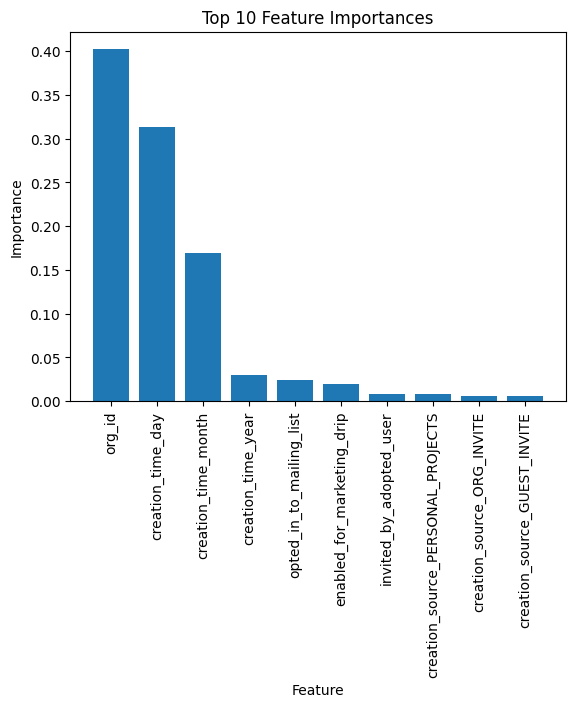

In [127]:
import matplotlib.pyplot as plt

# Sort features by importance
feature_names = X.columns
sorted_idx = importances.argsort()[::-1]

# Plot the top N features
top_n = 10  # Change this to the desired number of top features to plot
plt.bar(range(top_n), importances[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top {} Feature Importances".format(top_n))
plt.show()

In [128]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Make predictions on the test set
y_pred = rf.predict(X_train)

f1 = f1_score(y_train, y_pred)
print("train f1 : ",f1)
recall = recall_score (y_train, y_pred)
print("train recall : ",recall)

# Make predictions on the test set
y_pred = rf.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("test f1 : ",f1)
recall = recall_score (y_test, y_pred)
print("test recall : ",recall)


train f1 :  0.9992211838006231
train recall :  1.0
test f1 :  0.07446808510638298
test recall :  0.0438871473354232


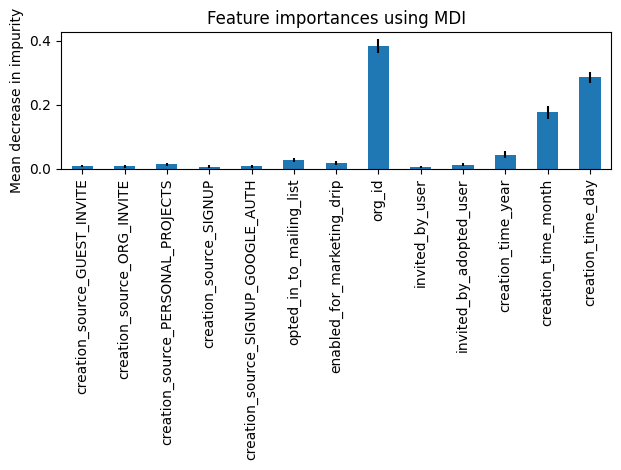

In [104]:
import numpy as np
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


feature_names = list(X.columns)
# feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [105]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

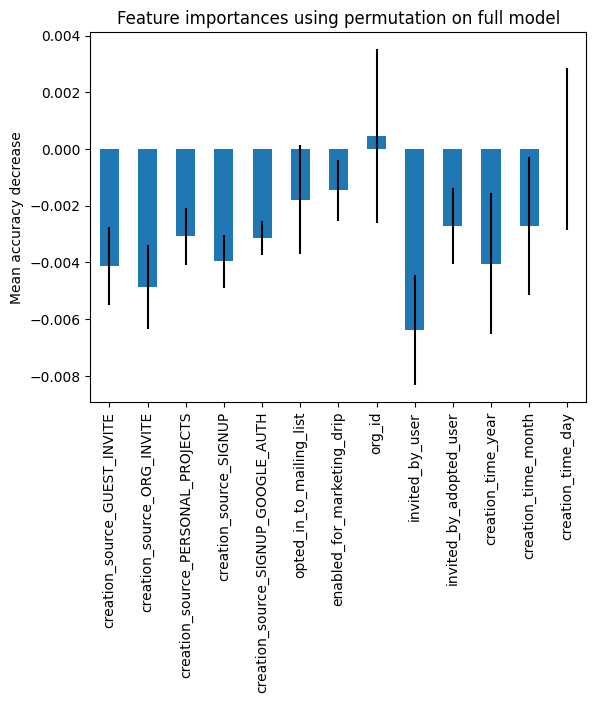

In [108]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
plt.show()

##### 2a) Writeup associated with methodology

To identify which factors predict user adoption, I prefer to proceed with a predictive approach.

### 3) What Factors Predict User Adoption?

##### 3a) Writeup associated with what factors predict user adoption?

### 4) Additional Commentary (Optional)